In [1]:
%load_ext autoreload
%autoreload 2
from loaders.generator import SynthBooleanMatrix, DiagBooleanMatrix, ArbiBooleanMatrix
from models.asso import Asso
from utils.display import show_matrix
from copy import deepcopy

In [3]:
# for all
n_row=200
n_col=100
k=5
noise=0.1
seed=1024

# for synth
density=0.15

# for diag
overlap=[0.2, 0.1, 0.2, 0.1]

# for arbi
overlap_flag=True
size_range=[0.5, 1.0, 0.5, 1.0]

[I] m            : 200
[I] n            : 100
[I] k            : 5
[I] overlap_flag : False
[I] size_range   : [0.5 1.  0.5 1. ]
[I] seed         : 1692257604


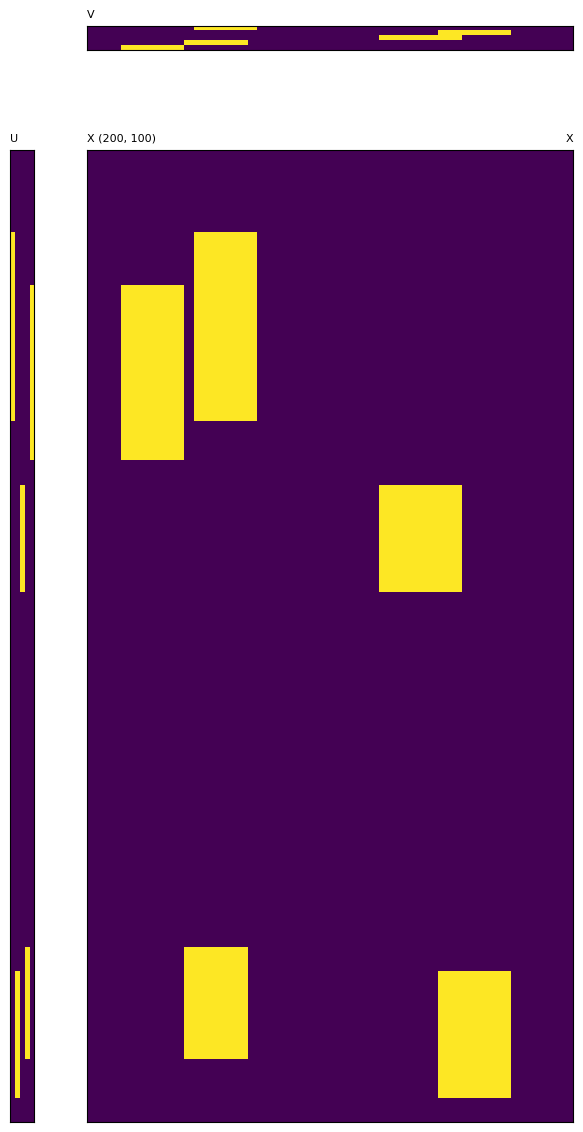

In [21]:
m_arbi_sorted = ArbiBooleanMatrix(m=n_row, n=n_col, k=5, overlap_flag=False, size_range=size_range)
m_arbi_sorted.generate(1692257604) # if no seed assigned, use time instead

settings = [(m_arbi_sorted.U, [1, 0], "U"),
            (m_arbi_sorted.V, [0, 1], "V"),
            (m_arbi_sorted.X, [1, 1], "X " + str(m_arbi_sorted.X.shape))]
show_matrix(settings=settings, pixels=10, title="X")

[I] m            : 50
[I] n            : 100
[I] k            : 5
[I] overlap_flag : False
[I] size_range   : [0.5 1.  0.5 1. ]
[I] seed         : 1692258082


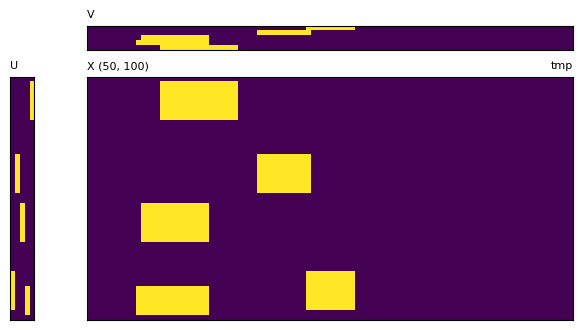

In [22]:
tmp = ArbiBooleanMatrix(m=50, n=n_col, k=5, overlap_flag=False, size_range=size_range)
tmp.generate() # if no seed assigned, use time instead

settings = [(tmp.U, [1, 0], "U"),
            (tmp.V, [0, 1], "V"),
            (tmp.X, [1, 1], "X " + str(tmp.X.shape))]
show_matrix(settings=settings, pixels=10, title="tmp")

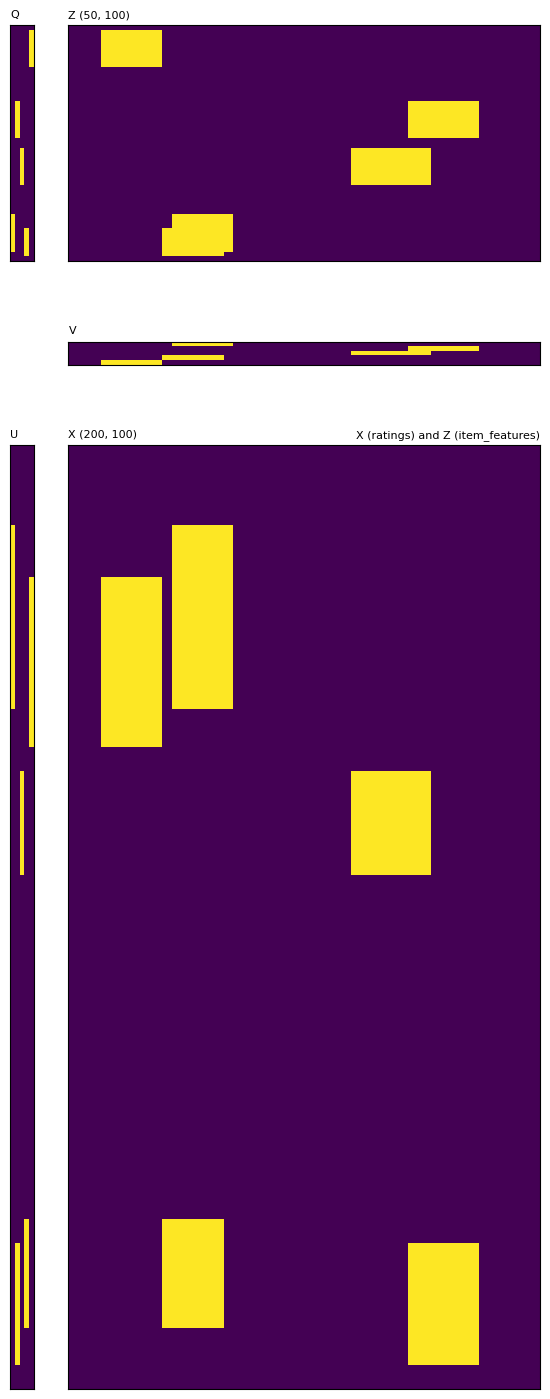

In [24]:
Q = tmp.U
V = m_arbi_sorted.V

Z = tmp.boolean_matmul(U=Q, V=V)

settings = [(Q, [0, 1], "Q"),
            (V, [1, 2], "V"),
            (Z, [0, 2], "Z " + str(Z.shape)),
            (m_arbi_sorted.U, [2, 1], "U"),
            (m_arbi_sorted.X, [2, 2], "X " + str(m_arbi_sorted.X.shape))]
show_matrix(settings=settings, pixels=10, title="X (ratings) and Z (item_features)")

In [29]:
import numpy as np
def build_assoc(X, dim=1):
    m, n = X.shape
    assoc = np.zeros([n, n])
    for i in range(n):
        for j in range(n):
            assoc[i, j] = confidence(vec_i=X[:, i], vec_j=X[:, j])
    return assoc

def confidence(vec_i, vec_j):
    if np.sum(vec_i) > 0:
        return np.sum(np.multiply(vec_i, vec_j)) / np.sum(vec_i)
    else:
        return 0

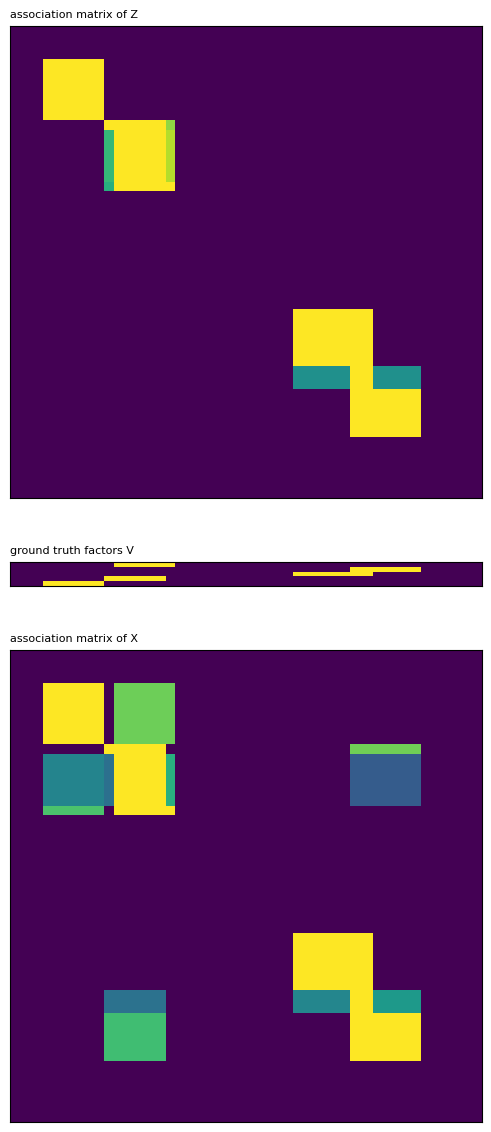

In [30]:
assoc_X = build_assoc(X=m_arbi_sorted.X)
assoc_Z = build_assoc(X=Z)

settings = [(assoc_Z, [0, 0], "association matrix of Z"),
            (V, [1, 0], "ground truth factors V"),
            (assoc_X, [2, 0], "association matrix of X")]
show_matrix(settings=settings, pixels=10)

[I] noise        : [0.1 0.1]
[I] noise        : [0.1 0.1]


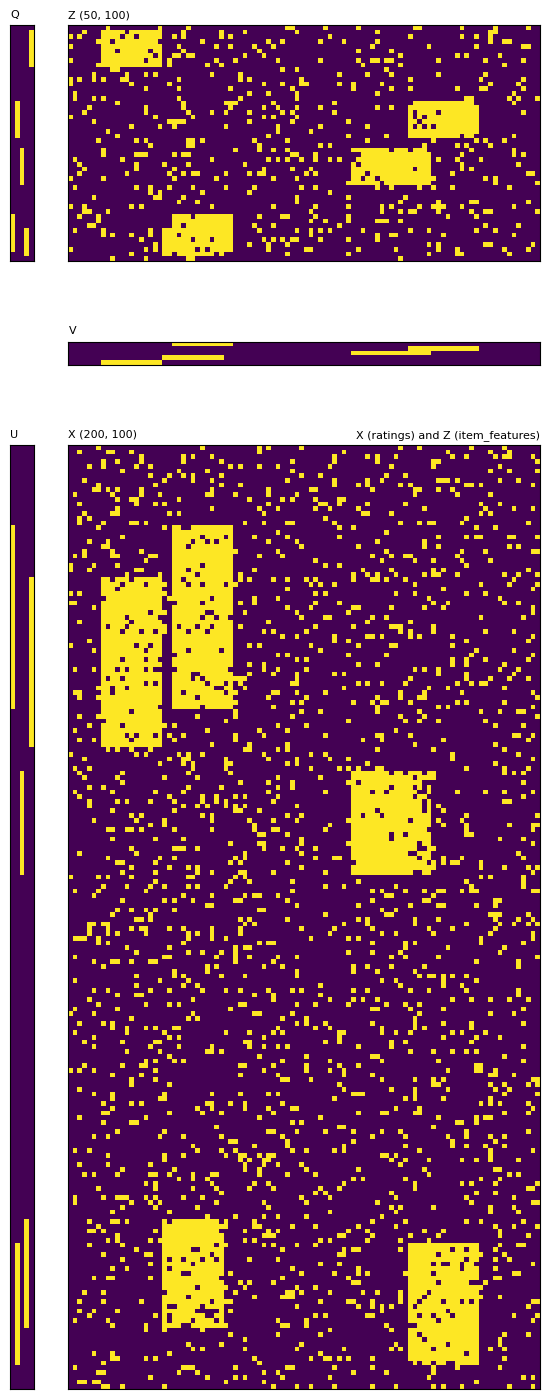

In [31]:
Z_noised = tmp.add_noise(Z, noise=0.1)
X_noised = tmp.add_noise(m_arbi_sorted.X, noise=0.1)

settings = [(Q, [0, 1], "Q"),
            (V, [1, 2], "V"),
            (Z_noised, [0, 2], "Z " + str(Z.shape)),
            (m_arbi_sorted.U, [2, 1], "U"),
            (X_noised, [2, 2], "X " + str(m_arbi_sorted.X.shape))]
show_matrix(settings=settings, pixels=10, title="X (ratings) and Z (item_features)")

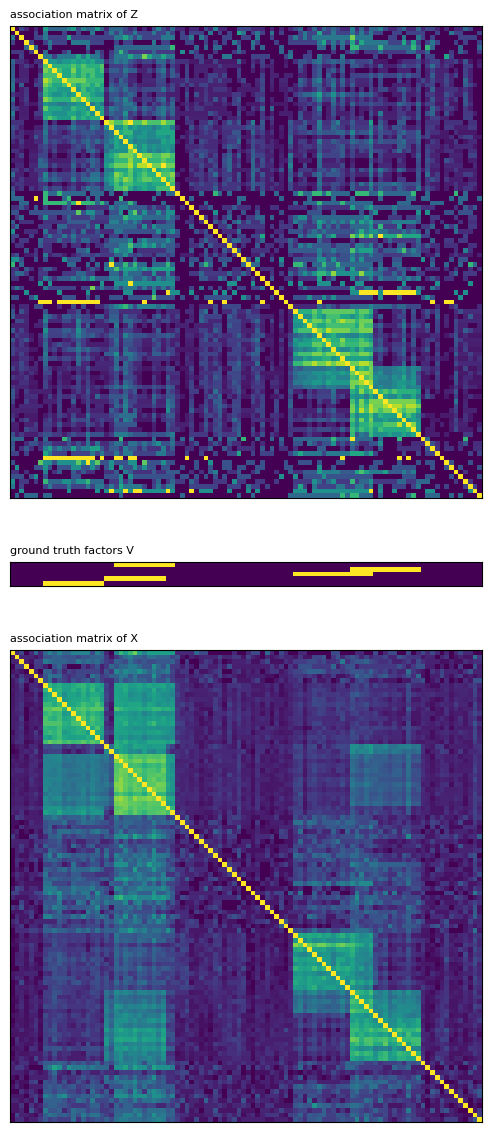

In [32]:
assoc_X = build_assoc(X=X_noised)
assoc_Z = build_assoc(X=Z_noised)

settings = [(assoc_Z, [0, 0], "association matrix of Z"),
            (V, [1, 0], "ground truth factors V"),
            (assoc_X, [2, 0], "association matrix of X")]
show_matrix(settings=settings, pixels=10)

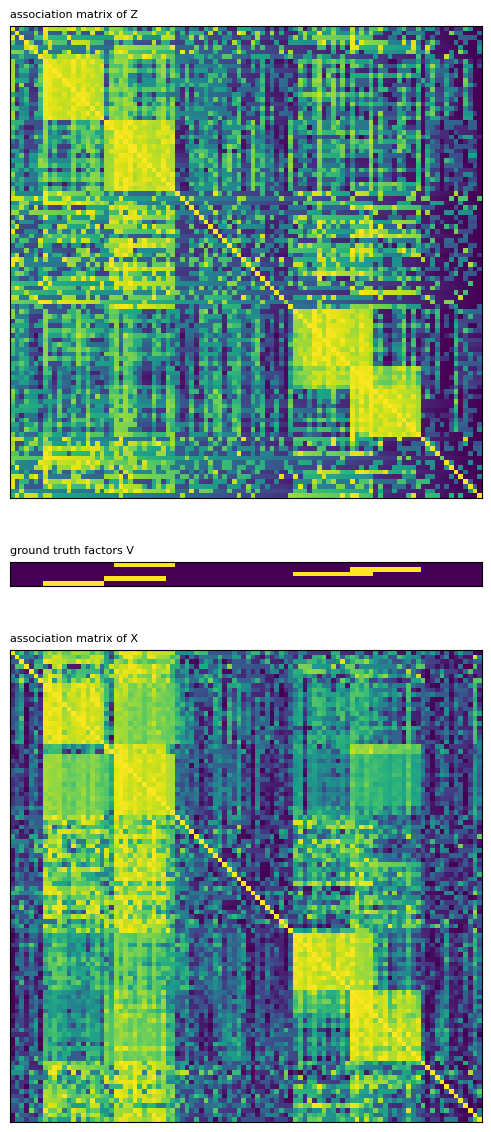

In [37]:
# compute the distance of candidates

def replace_with_order(lst):
    sorted_lst = sorted(enumerate(lst), key=lambda x: x[1], reverse=True)
    order_mapping = {index: i + 1 for i, (index, _) in enumerate(sorted_lst)}
    return [order_mapping[index] for index in range(len(lst))]

def assoc_quantification(assoc):
    for r in range(assoc.shape[1]):
        assoc[r,:] = replace_with_order(assoc[r,:])
    return assoc

order_Z = assoc_quantification(assoc_Z)
order_X = assoc_quantification(assoc_X)

settings = [(100-order_Z, [0, 0], "association matrix of Z"),
            (V, [1, 0], "ground truth factors V"),
            (100-order_X, [2, 0], "association matrix of X")]
show_matrix(settings=settings, pixels=10)

In [34]:
def replace_with_order(lst):
    sorted_lst = sorted(enumerate(lst), key=lambda x: x[1], reverse=True)
    order_mapping = {index: i + 1 for i, (index, _) in enumerate(sorted_lst)}
    return [order_mapping[index] for index in range(len(lst))]

values = [7, 2, 9, 5, 1]
replaced_values = replace_with_order(values)
print(replaced_values)

[2, 4, 1, 3, 5]


In [ ]:
width_bound = [5, 30]
width_min = width_bound[0]
width_max = width_bound[1]

for r in range(n_col):
    score_for_each_row = [0] * n_col

    for i in range

AttributeError: 'list' object has no attribute 'shape'